# Group 12
# Project: BIP CANCER CHALLENGE

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#References">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

##### Dataset Description


>Unnamed: 0_x':                           DROP                          
'PATIENTID': Patient identifier             
'ETHNICITY': race       
'DEATHCAUSECODE_1A',        
'DEATHCAUSECODE_1B',     
'DEATHCAUSECODE_1C',       
'DEATHCAUSECODE_2':       
'DEATHCAUSECODE_UNDERLYING',           
'DEATHLOCATIONCODE': where the patient died               
'NEWVITALSTATUS': Outcome variable     
'VITALSTATUSDATE',      Date died or alive      
'SEX_x':        gender
'LINKNUMBER_x':                             DROP      
'Unnamed: 0_y',:                            DROP       
'TUMOURID',       DROP       
'DIAGNOSISDATEBEST':      Date of cancer diagnosis    
'SITE_ICD10_O2':     Site of neoplasm(specific)     
'SITE_ICD10_O2_3CHAR',        Site of neoplasm(general)     
'MORPH_ICD10_O2': Morphology of the cancer          
'BEHAVIOUR_ICD10_O2': Behaviour of the cancer i.e benign, malignant etc       
'T_BEST':   Primary tumor      
'N_BEST': Regional lymph nodes    
'M_BEST:  Distant metastasis            
'STAGE_BEST' : cancer stage   
'STAGE_BEST_SYSTEM',    
'GRADE':  Grade of tumour    
'AGE',    
'CREG_CODE': Cancer registry catchment area code    
'SCREENINGSTATUSFULL_CODE',     
'ER_STATUS',    
'ER_SCORE',    
'PR_STATUS',     
'PR_SCORE',    
'HER2_STATUS',    
'CANCERCAREPLANINTENT',    
'PERFORMANCESTATUS',   
'CNS',    
'ACE27',    
'GLEASON_PRIMARY': DROP    
'GLEASON_SECONDARY': DROP   
'GLEASON_TERTIARY': DROP   
'GLEASON_COMBINED': DROP    
'DATE_FIRST_SURGERY',   
'LATERALITY': describes which side of a paired organ is the origin of the primary cancer    
'QUINTILE_2015',    
'SEX_y',    
'LINKNUMBER_y'   DROP



### Deliverables

> A written report showing their investigation, findings and interpretation.

> a final submission to the classification problem

> a presentation delivered live with accompanying slides

In [1]:
#!pip install statsmodels

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

/kaggle/input/bip-cancer-technical-challenge/simulacrum_data_dictionary.xlsx
/kaggle/input/bip-cancer-technical-challenge/av_patient_test.csv
/kaggle/input/bip-cancer-technical-challenge/all_z_lookup_tables.xlsx
/kaggle/input/bip-cancer-technical-challenge/av_tumour_train.csv
/kaggle/input/bip-cancer-technical-challenge/av_tumour_test.csv
/kaggle/input/bip-cancer-technical-challenge/av_patient_train.csv


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statistics
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#random.seed(12)
np.random.seed(12) #reproducibility

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id='wrangling'></a>
## Data Wrangling


#### Load dataset, examine data structure, clean, trim and perform descriptive statistics

In [4]:
# # Load dataset 
url1 = r'/kaggle/input/bip-cancer-technical-challenge/av_patient_train.csv'
url2 = r'/kaggle/input/bip-cancer-technical-challenge/av_tumour_train.csv'
url3 = r'/kaggle/input/bip-cancer-technical-challenge/av_patient_test.csv'
url4 = r'/kaggle/input/bip-cancer-technical-challenge/av_tumour_test.csv'

In [5]:
# Load datasets
df1= pd.read_csv(url1)
df2= pd.read_csv(url2)
df3= pd.read_csv(url3)
df4= pd.read_csv(url4)

In [6]:
# Merge both datasets into one
data= pd.merge(df1,df2, on='PATIENTID', how='inner')
data_test= pd.merge(df3,df4, on='PATIENTID', how='inner')

# Train Data

In [7]:
data.head()

,Unnamed: 0_x,PATIENTID,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,...,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,SEX_y,LINKNUMBER_y
0,624712,20011904,R,NaN,NaN,NaN,NaN,NaN,NaN,A,...,NaN,NaN,NaN,NaN,NaN,2014-05-30,L,1 - least deprived,2,820011904
1,1054445,40016070,A,"C349,J449",NaN,NaN,NaN,C349,2,D,...,NaN,NaN,NaN,NaN,NaN,NaN,R,5 - most deprived,2,840016070
2,827174,20203163,A,J969,NaN,NaN,NaN,I64,1,A,...,NaN,NaN,NaN,NaN,NaN,2017-08-02,R,2,2,820203163
3,1184612,40156705,A,NaN,NaN,NaN,"I259,I251",NaN,NaN,D,...,NaN,NaN,NaN,NaN,NaN,2016-05-03,R,4,1,840156705
4,666451,20051096,A,NaN,NaN,NaN,NaN,NaN,NaN,A,...,0,NaN,NaN,NaN,NaN,2016-01-05,L,3,2,820051096


##### Inspect data set for data types, unique values, counts and missing values

In [8]:
# Helper function to inspect and assess the data characteristics
def get_data_summary(data):
  summary = pd.concat([
      data.dtypes,
      data.nunique(),
      data.count(),
      data.isnull().sum(),
      (data.isnull().sum() / len(data) * 100).rename('missing percentage')
      ],
      axis=1)
  summary.columns =['dtypes', 'nunique', 'count', 'missing values','% of Missing_values']
  return summary

In [9]:
 get_data_summary(data)

,dtypes,nunique,count,missing values,% of Missing_values
Unnamed: 0_x,int64,100000,100000,0,0.000
PATIENTID,int64,100000,100000,0,0.000
ETHNICITY,object,20,98032,1968,1.968
DEATHCAUSECODE_1A,object,1683,43017,56983,56.983
DEATHCAUSECODE_1B,object,1288,11956,88044,88.044
DEATHCAUSECODE_1C,object,540,2036,97964,97.964
DEATHCAUSECODE_2,object,5697,18506,81494,81.494
DEATHCAUSECODE_UNDERLYING,object,691,43013,56987,56.987
DEATHLOCATIONCODE,object,7,43072,56928,56.928
NEWVITALSTATUS,object,2,100000,0,0.000


In [10]:
data.columns

Index(['Unnamed: 0_x', 'PATIENTID', 'ETHNICITY', 'DEATHCAUSECODE_1A',
       'DEATHCAUSECODE_1B', 'DEATHCAUSECODE_1C', 'DEATHCAUSECODE_2',
       'DEATHCAUSECODE_UNDERLYING', 'DEATHLOCATIONCODE', 'NEWVITALSTATUS',
       'VITALSTATUSDATE', 'SEX_x', 'LINKNUMBER_x', 'Unnamed: 0_y', 'TUMOURID',
       'DIAGNOSISDATEBEST', 'SITE_ICD10_O2', 'SITE_ICD10_O2_3CHAR',
       'MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2', 'T_BEST', 'N_BEST', 'M_BEST',
       'STAGE_BEST', 'STAGE_BEST_SYSTEM', 'GRADE', 'AGE', 'CREG_CODE',
       'SCREENINGSTATUSFULL_CODE', 'ER_STATUS', 'ER_SCORE', 'PR_STATUS',
       'PR_SCORE', 'HER2_STATUS', 'CANCERCAREPLANINTENT', 'PERFORMANCESTATUS',
       'CNS', 'ACE27', 'GLEASON_PRIMARY', 'GLEASON_SECONDARY',
       'GLEASON_TERTIARY', 'GLEASON_COMBINED', 'DATE_FIRST_SURGERY',
       'LATERALITY', 'QUINTILE_2015', 'SEX_y', 'LINKNUMBER_y'],
      dtype='object')

### Data Cleaning
> Rename column names if neccessary  
convert data types                                                                                             
Remove unnecessary variables                                                                                                   
Recode variable values                                                                                                                      
Transform some data

##### Initial inspection of columns

In [11]:
all_columns = pd.Series(list(df1) + list(df2))
all_columns[all_columns.duplicated()]

13    Unnamed: 0
15     PATIENTID
46           SEX
47    LINKNUMBER
dtype: object

In [12]:
# Examine any mismatches in the merged data for sex, linknumber and unnamed
data.loc[data['SEX_x']!=data['SEX_y']]
data.loc[data['LINKNUMBER_x']!=data['LINKNUMBER_y']]
data.loc[data['Unnamed: 0_x']!=data['Unnamed: 0_y']]

,Unnamed: 0_x,PATIENTID,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,...,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,SEX_y,LINKNUMBER_y


In [13]:
# Drop duplicated colunms as a result of the merge and initial unneeded columns
drop_list = ['SEX_y','LINKNUMBER_y', 'Unnamed: 0_y','Unnamed: 0_x', 'LINKNUMBER_x', 'GLEASON_PRIMARY', 'GLEASON_SECONDARY',
       'GLEASON_TERTIARY', 'GLEASON_COMBINED']

data.drop(columns= drop_list, axis = 1, inplace=True )


##### Ethnicity
1. aggregate ethnic groups
2. fill missing values with either mode or MICE

In [14]:
data.ETHNICITY.value_counts()

A    85237
C     3193
Z     2818
S     1103
H      947
B      882
M      743
L      547
X      516
J      512
N      481
P      246
R      233
K      177
G      171
D       85
F       72
E       49
0       18
8        2
Name: ETHNICITY, dtype: int64

##### Deathcause code

'DEATHCAUSECODE_1A',    
'DEATHCAUSECODE_1B',   
 'DEATHCAUSECODE_1C',   
 'DEATHCAUSECODE_2',   
 'DEATHCAUSECODE_UNDERLYING',     
 'DEATHLOCATIONCODE': where the patient died

 1. understand what they mean    
  can we combine them to one column?
2. the column contains more than one ICD code how can we address this: choose 1?

In [15]:
data.DEATHCAUSECODE_1A.value_counts()

C349                       14538
C509                        2467
C189                        2309
J189                        2209
C798                        1990
                           ...  
M600                           1
J449,I500                      1
C19,C780,C787,C679,C786        1
R64,C349                       1
C19,Y839,T819                  1
Name: DEATHCAUSECODE_1A, Length: 1683, dtype: int64

In [16]:
# Fill in other death cause codes available in death cause code 1A
#data['ALIVE_DEATHCAUSECODE'] = np.nan

# Define the prioritized column order
cause_columns = ['DEATHCAUSECODE_1A', 'DEATHCAUSECODE_1B', 'DEATHCAUSECODE_1C', 'DEATHCAUSECODE_2', 'DEATHCAUSECODE_UNDERLYING']

# Iterate through each row
for index, row in data.iterrows():
    # Iterate through the prioritized columns
    for column in cause_columns:
        # Check if the cause of death value exists in the column
        if not pd.isna(row[column]):
            # Assign the cause of death value to the 'DEATHCAUSECODE' column
            data.at[index, 'DEATHCAUSECODE_1A'] = row[column]
            break  # Exit the loop once a value is found

In [17]:
# Change vital status of patients alive but with a death cause code to dead
#data.loc[(data['NEWVITALSTATUS']== 'A') & (data['DEATHCAUSECODE_1A'].notnull()), 'NEWVITALSTATUS']= 'D'

In [18]:
# fill in 'A000' as death cause code for patients that are alive

data.loc[data['NEWVITALSTATUS']== 'A', 'DEATHCAUSECODE_1A'] = 'A000'

In [19]:
data.drop(['DEATHCAUSECODE_1B', 'DEATHCAUSECODE_1C', 'DEATHCAUSECODE_2', 'DEATHCAUSECODE_UNDERLYING'], axis=1, inplace=True)

In [20]:
data.DEATHCAUSECODE_1A.isnull().sum()

14681

In [21]:
data = data.dropna(subset=['DEATHCAUSECODE_1A'])

In [22]:
# Check patients who have no death cause code but have a death location
#data.loc[data['DEATHCAUSECODE_1A'].isna() & data['DEATHLOCATIONCODE'].notnull()]

In [23]:
# # Create a new column 'DEATHCAUSECODE' with NaN values
# joined_dataset['ALIVE_DEATHCAUSECODE'] = np.nan

# # Define the prioritized column order
# cause_columns = ['DEATHCAUSECODE_1A', 'DEATHCAUSECODE_1B', 'DEATHCAUSECODE_1C']

# # Iterate through each row
# for index, row in df.iterrows():
#     # Iterate through the prioritized columns
#     for column in cause_columns:
#         # Check if the cause of death value exists in the column
#         if not pd.isna(row[column]):
#             # Assign the cause of death value to the 'DEATHCAUSECODE' column
#             joined_dataset.at[index, 'ALIVE_DEATHCAUSECODE'] = row[column]
#             break  # Exit the loop once a value is found

In [24]:
#data.loc[(data['NEWVITALSTATUS']== 'D') & data['DEATHCAUSECODE_1A'].isna() & data['DEATHLOCATIONCODE'].isna()]

##### DEATHLOCATIONCODE


1	HOSPITAL   
2	PRIVATE HOME   
3	HOSPICE NOS    
4	NURSING HOME   
5	OTHER   
X	UNKNOWN

In [25]:
data.DEATHLOCATIONCODE.value_counts()

1    17020
4    14320
2     5345
X     3683
5     1818
6      833
3        2
Name: DEATHLOCATIONCODE, dtype: int64

In [26]:
data.DEATHLOCATIONCODE.isnull().sum()

42298

In [27]:
# fill in 'A' as death location code for patients that are alive

data.loc[data['NEWVITALSTATUS']== 'A', 'DEATHLOCATIONCODE'] = 'A'

In [28]:
data.DEATHLOCATIONCODE.isnull().sum()

1737

In [29]:
#data.loc[data['DEATHLOCATIONCODE'].isnull() & data['NEWVITALSTATUS']== 'A']
#data.loc[(data['NEWVITALSTATUS']== 'A') & (data['DEATHLOCATIONCODE'].notnull())]

In [30]:
#
data = data.dropna(subset=['DEATHLOCATIONCODE'])


##### Address Data type mismatches

VITALSTATUSDATE, DIAGNOSISDATEBEST, DATE_FIRST_SURGERY   
1. what other variables can we generate from these dates
e.g    
diag date - date of first surgery
days

In [31]:
# Convert data types
data.DATE_FIRST_SURGERY = pd.to_datetime(data.DATE_FIRST_SURGERY)
data.VITALSTATUSDATE = pd.to_datetime(data.VITALSTATUSDATE)
data.DIAGNOSISDATEBEST = pd.to_datetime(data.DIAGNOSISDATEBEST)

##### Check for any logical discrepancies

In [32]:
# Does any one have a vital status date before diagnosis date?
data.loc[data['VITALSTATUSDATE'] < data['DIAGNOSISDATEBEST']]

,PATIENTID,ETHNICITY,DEATHCAUSECODE_1A,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE,SEX_x,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,...,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015


In [33]:
# Does any one have a surgery before before diagnosis?
data.loc[data['DATE_FIRST_SURGERY'] < data['DIAGNOSISDATEBEST']]

,PATIENTID,ETHNICITY,DEATHCAUSECODE_1A,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE,SEX_x,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,...,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
1751,80010943,A,"C20,C780",2,D,2016-07-04,2,80010943,2014-04-29,C20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-28,9,3
2123,60086175,A,J180,2,D,2019-02-08,2,60086175,2015-07-27,C180,...,NaN,NaN,NaN,C,NaN,NaN,NaN,2015-07-24,9,4
2243,80001839,A,A000,A,A,2019-02-08,2,80001839,2014-08-15,C20,...,NaN,NaN,NaN,Z,9,NaN,NaN,2014-08-14,9,3
2640,40047500,A,A000,A,A,2019-02-11,1,40047500,2016-02-15,C349,...,NaN,NaN,NaN,Z,3,NaN,NaN,2016-02-13,9,4
3144,80015805,A,A000,A,A,2019-02-09,1,80015805,2014-04-28,C20,...,NaN,NaN,NaN,C,0,NaN,0,2014-03-28,9,1 - least deprived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95174,60033902,A,C189,1,D,2017-11-18,1,60033902,2016-08-24,C180,...,NaN,NaN,NaN,9,NaN,NaN,NaN,2016-08-23,R,2
96539,80042416,NaN,A000,A,A,2019-02-07,1,80042416,2015-02-11,C20,...,NaN,NaN,NaN,Cm,NaN,NaN,NaN,2015-02-08,9,1 - least deprived
97137,40120559,A,C349,2,D,2013-12-02,1,40120559,2013-10-18,C343,...,NaN,NaN,NaN,9,NaN,NaN,NaN,2013-09-07,L,4
98882,40124377,A,C349,2,D,2018-01-05,2,40124377,2017-07-05,C343,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-04,L,5 - most deprived


In [34]:
# replace diagnosis date with date of first surgery for patients who have had a surgery before diagnosis
data.loc[data['DIAGNOSISDATEBEST'] > data['DATE_FIRST_SURGERY'], 'DIAGNOSISDATEBEST'] = data.loc[data['DIAGNOSISDATEBEST'] > data['DATE_FIRST_SURGERY'], 'DATE_FIRST_SURGERY']

#####  Derived variables

In [35]:
# Calculate number of days from cancer diagnosis to first surgery
# days_per_year = 365.2425
# data['DAYSTOSURGERY'] = (data['DATE_FIRST_SURGERY'] - data['DIAGNOSISDATEBEST']).dt.days

In [36]:
#data.DAYSTOSURGERY.isnull().sum()

In [37]:
# Create surgery status based on date first surgery
data['SURGERYSTATUS'] = np.where(data['DATE_FIRST_SURGERY'].isnull(), 0, 1)

In [38]:
# Extract year from dates
data['DATE_FIRST_SURGERY'] = data['DATE_FIRST_SURGERY'].dt.year
data['VITALSTATUSDATE'] = data['VITALSTATUSDATE'].dt.year
data['DIAGNOSISDATEBEST'] = data['DIAGNOSISDATEBEST'].dt.year

##### Recode variables

##### New vital status: Outcome variable

In [39]:
# recode vital status to D:1, A:0
data['NEWVITALSTATUS'] = data['NEWVITALSTATUS'].replace({'D' :1, 'A': 0}).astype('Int32')

##### Sex

In [40]:
data.rename(columns={'SEX_x': 'SEX',
                                    }, inplace = True)

In [41]:
data.SEX.value_counts()

2    57442
1    26140
Name: SEX, dtype: int64

##### Site of cancer
'SITE_ICD10_O2'- specific cancer site e.g nipple and areola    
'SITE_ICD10_O2_3CHAR',- General cancer site e.g Breast, lung etc    
1. check if general group correlates with specific
2. should we drop one? if yes which one. the general one is compact might be good for the ML model, variability in the specifics can be good too
3. recode

In [42]:
# confirm that SITE_ICD10_O2_3CHAR is the accurate group(using the SITE_ICD10_O2)

# df= data.loc[data['SITE_ICD10_O2'].notnull(), ['SITE_ICD10_O2','SITE_ICD10_O2_3CHAR']]

# df['SITE_ICD10_O2_test'] = df['SITE_ICD10_O2'].apply(lambda x: x[:3])

# df.loc[df['SITE_ICD10_O2_test'] != df['SITE_ICD10_O2_3CHAR']]

In [43]:
data['SITE_ICD10_O2'].fillna(data['SITE_ICD10_O2_3CHAR'], inplace=True)
data.drop(['SITE_ICD10_O2_3CHAR'], axis=1, inplace= True)

##### Morphology and behaviour

In [44]:
data[['MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2']]

,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2
0,8500.0,3
1,8046.0,3
2,8500.0,3
4,8500.0,3
5,8500.0,3
...,...,...
99995,8500.0,3
99996,8500.0,3
99997,8140.0,3
99998,8522.0,3


In [45]:
data.BEHAVIOUR_ICD10_O2.value_counts()

3    81980
3     1417
5      137
X       13
9        8
5        4
Name: BEHAVIOUR_ICD10_O2, dtype: int64

In [46]:
data['BEHAVIOUR_ICD10_O2'] = data['BEHAVIOUR_ICD10_O2'].replace({3: '3', 5:'5'})

In [47]:
data['MORPH_ICD10_O2'] =(data
                  .groupby(['BEHAVIOUR_ICD10_O2'],sort=False)['MORPH_ICD10_O2']
                  .apply(lambda x : x.fillna(stats.mode(x)[0][0]))
                 )

In [48]:
#data.loc[data['MORPH_ICD10_O2'].isnull(), ['BEHAVIOUR_ICD10_O2', 'MORPH_ICD10_O2']]

In [49]:
#data = data.dropna(subset=['MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2'])

#####  Cancer Staging
T_BEST size of the tumour, with numbers 1 to 4 (1 for small, 4 for large)    
N_BEST lymph nodes, with numbers 0 to 3 (0 means no lymph nodes have cancer, 3 means many do)    
M_BEST  metastases or whether the cancer has spread to another part of the body, with numbers 0 or 1 (0 means it has not spread, 1 means it has)    
STAGE_BEST   
STAGE_BEST_SYSTEM   
GRADE

In [50]:
 data.T_BEST.value_counts()

2      15990
3      15244
1c     10394
4       9675
1b      5901
1       4852
2a      4093
1a      3295
4b      1935
2b      1425
4a       530
3b       164
1mi      139
3a       136
4d       129
3c        83
0         64
is        57
4c        55
3d        24
3s         9
2s         7
2c         6
1d         6
X          6
2d         4
2a2        3
T1         1
1b2        1
1C         1
Name: T_BEST, dtype: int64

In [51]:
# def extract_numbers_with_regex(input_string):
#     numbers = re.findall(r'(\d+)x', input_string)
#     return [int(number) for number in numbers]

# # Apply the function to the DataFrame and create a new column 'numbers_list'
# df['numbers_list'] = df['text_column'].apply(extract_numbers_with_regex)

In [52]:
# extract numbers only from the values
def get_number(text):
    return text[:1] if isinstance(text, str) else text

T_BEST size of the tumour, with numbers 1 to 4 (1 for small, 4 for large)

In [53]:
data['T_BEST']= data['T_BEST'].apply(get_number)
data.T_BEST.value_counts()

1    24589
2    21528
3    15660
4    12324
0       64
i       57
X        6
T        1
Name: T_BEST, dtype: int64

N_BEST lymph nodes, with numbers 0 to 3 (0 means no lymph nodes have cancer, 3 means many do)

In [54]:
# data.N_BEST.value_counts()

In [55]:
data['N_BEST']= data['N_BEST'].apply(get_number)
data.N_BEST.value_counts()

0    40902
1    16328
2    11124
3     5744
X        8
Name: N_BEST, dtype: int64

M_BEST  metastases or whether the cancer has spread to another part of the body, with numbers 0 or 1 (0 means it has not spread, 1 means it has)

In [56]:
 #data.M_BEST.value_counts()

In [57]:
data['M_BEST']= data['M_BEST'].apply(get_number)
data.M_BEST.value_counts()

0    50264
1    15996
X       19
Name: M_BEST, dtype: int64

STAGE_BEST  
0   hasn't spread  
6	6 NOT STAGEABLE   
?	INSUFFICIENT INFO   
U	UNSTAGEABLE    
X	X NOT STAGED

In [58]:
 data.STAGE_BEST.value_counts()

1A     17204
4      16059
2A     10543
?       6540
3       6329
2       5851
2B      5495
3A      4755
1       4443
3B      2873
1B      2365
3C       592
U        219
0        146
4C        49
2C        34
4A        34
4B        30
4S         7
3S         4
1A2        3
2A1        2
2S         1
1C         1
3E         1
2A2        1
1S         1
Name: STAGE_BEST, dtype: int64

In [59]:
# Extract stage number from Stage
data['STAGE_BEST'] = data['STAGE_BEST'].apply(lambda x: x[:1])

data.STAGE_BEST.value_counts()

1    24017
2    21927
4    16179
3    14554
?     6540
U      219
0      146
Name: STAGE_BEST, dtype: int64

In [60]:
# Replace '?' with 'I'
data['STAGE_BEST'] = data['STAGE_BEST'].replace({'?' :'I'})

data.STAGE_BEST.value_counts()

1    24017
2    21927
4    16179
3    14554
I     6540
U      219
0      146
Name: STAGE_BEST, dtype: int64

##### STAGE_BEST_SYSTEM

In [61]:
data.drop(['STAGE_BEST_SYSTEM'], axis=1, inplace= True)

Grade of tumour

0	0 BORDERLINE MALIGNANCY   
1	1 / I / WELL DIFFERENTIATED  
2	2 / II / MODERATELY DIFFERENTIATED   
3	3 / III / POORLY DIFFERENTIATED    
4	4 / IV / UNDIFFERENTIATED / ANAPLASTIC   
5	T CELL   
6	B CELL    
7	NULL CELL  
H	HIGH   
I	INTERMEDIATE    
L	LOW     
X	X


In [62]:
data.GRADE.value_counts()

G2    33835
GX    24837
G3    17605
G1     6603
G4      201
Name: GRADE, dtype: int64

In [63]:
# Extract grade number

# def get_number(text):
#     return text[1:] if isinstance(text, str) else text

# data['GRADE']= data['GRADE'].apply(get_number)

# data.GRADE.value_counts()

In [64]:
data.GRADE.isnull().sum()

501

In [65]:
data['GRADE'] =(data
                  .groupby(['BEHAVIOUR_ICD10_O2','MORPH_ICD10_O2'],sort=False)['GRADE']
                  .apply(lambda x : x.fillna(stats.mode(x)[0][0]))
                 )

In [66]:
data.GRADE.isnull().sum()

23

##### Age

1. Outliers

In [67]:
data.AGE.describe()

count    83582.000000
mean        68.107057
std         13.776761
min          1.000000
25%         59.000000
50%         69.000000
75%         78.000000
max        105.000000
Name: AGE, dtype: float64

<Axes: >

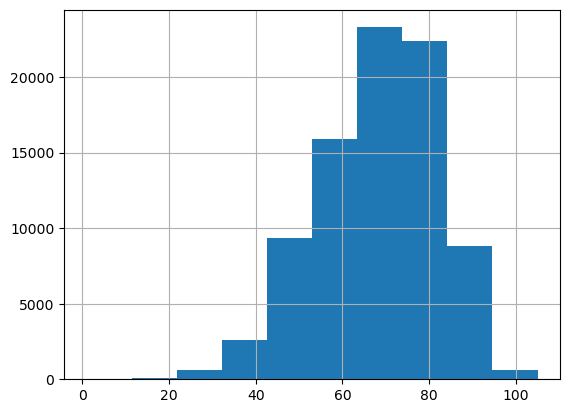

In [68]:
data.AGE.hist()

##### CREG_CODE
Cancer registry catchment area code, no missing value

1. do we want to map this?

In [69]:
data.CREG_CODE.value_counts()

L0801    16654
L1001    12603
L0201    11739
L1701    11588
L0401     9322
L1201     8865
L0301     8471
L0901     4340
Name: CREG_CODE, dtype: int64

##### SCREENINGSTATUSFULL_CODE

In [70]:
data.SCREENINGSTATUSFULL_CODE.value_counts()

6001.0    9931
6006.0    4722
6012.0    3954
7010.0    2399
6013.0    2254
6014.0    1658
6021.0    1586
7006.0    1442
7001.0    1229
6022.0     503
7009.0      66
6007.0      49
7002.0      32
6002.0      21
7007.0      20
7012.0      15
7008.0      14
1.0         12
7003.0       9
6020.0       5
7011.0       2
6008.0       2
6016.0       1
6015.0       1
6009.0       1
9.0          1
Name: SCREENINGSTATUSFULL_CODE, dtype: int64

##### 'ER_STATUS', 'ER_SCORE', 'PR_STATUS','PR_SCORE', 'HER2_STATUS'
#####As theses markers are specific to breast cancer, and breast cancer ensure whether to use them in the model.
####If these markers are used only those with a location code beginning with C50(Breast cancer) will have these.

In [71]:
data.ER_STATUS.value_counts()

P     22474
U      4405
N      4162
Pm      170
X        43
B        18
Name: ER_STATUS, dtype: int64

In [72]:
data.drop(['SCREENINGSTATUSFULL_CODE','ER_STATUS', 'ER_SCORE', 'PR_STATUS','PR_SCORE', 'HER2_STATUS'], axis=1, inplace=True)

##### CANCERCAREPLANINTENT
9	Not known   
C	Curative   
X	No active treatment    
Z	Non Curative

1. assume cm and zm is an entry error and recode them as C & Z respecively and recode

In [73]:
data.CANCERCAREPLANINTENT.value_counts()

C     27968
Z      8960
9      4902
X      1715
Cm      484
Zm       99
Name: CANCERCAREPLANINTENT, dtype: int64

In [74]:
data['CANCERCAREPLANINTENT'] = data['CANCERCAREPLANINTENT'].replace({'Cm': 'C', 'Zm':'Z'})

In [75]:
data.CANCERCAREPLANINTENT.value_counts()

C    28452
Z     9059
9     4902
X     1715
Name: CANCERCAREPLANINTENT, dtype: int64

In [76]:
# fill null values with 9 which is not known
data.loc[data['CANCERCAREPLANINTENT'].isnull(), 'CANCERCAREPLANINTENT'] = '9'

##### PERFORMANCESTATUS

Performance status.   
0 = Able carry out all normal activity without restriction   
1 = Restricted in physically strenuous activity, but able to walk and do light work   
2 = Able to walk and capable of all self care, but unable to carry out any work. Up and about more than 50% of waking hours  
3 = Capable of only limited self care, confined to bed or chair more than 50% of waking hours   
4 = Completely disabled. Cannot carry on any self care. Totally confined to bed or chair  
9 = Not recorded  
1. make same assumption as cancercareplan.. recode

In [77]:
data.PERFORMANCESTATUS.value_counts()

0     16323
1      8904
9      6528
2      4396
3      3645
4      1147
1m      589
2m      348
3m      205
4m       43
Name: PERFORMANCESTATUS, dtype: int64

In [78]:
data['PERFORMANCESTATUS'] = (data['PERFORMANCESTATUS'].replace({'1m' :'1', '2m': '2', '3m': '3', '4m': '4'}))
data.PERFORMANCESTATUS.value_counts()

0    16323
1     9493
9     6528
2     4744
3     3850
4     1190
Name: PERFORMANCESTATUS, dtype: int64

In [79]:
# fill null values with 9 which is Not recorded
data.loc[data['PERFORMANCESTATUS'].isnull(), 'PERFORMANCESTATUS'] = '9'

##### CNS    
Clinical Nurse Specialist

In [80]:
data.CNS.value_counts()

Y1     13040
99      5818
Y2      2032
NI       608
NN       171
Y1m      148
Y4        62
Y2m       20
Y3        13
Y4m        5
NIm        4
Name: CNS, dtype: int64

##### ACE27
Adult Comorbidity Evaluation 27    
Valid comorbidity scores should be 0-3

In [81]:
data.ACE27.value_counts()

9     4404
0     3313
1     1310
2      896
3      707
1m      85
2m      67
3m      58
Name: ACE27, dtype: int64

In [82]:
data['ACE27'] = data['ACE27'].replace({'1m': '1', '2m':'2', '3m':'3'})
data.ACE27.value_counts()

9    4404
0    3313
1    1395
2     963
3     765
Name: ACE27, dtype: int64

##### Laterality
No misssing value   
9	X NOT KNOWN    
B	BILATERAL     
L	LEFT     
M	MIDLINE      
R	RIGHT

In [83]:
data.LATERALITY.value_counts()

R    30849
L    27946
9    24493
M      166
B      128
Name: LATERALITY, dtype: int64

##### quintile_2015
Measure of deprivation at small area level made up from the income domain in 2015, quintiles are calculated from populations   
no missing value
                                        
1 - least deprived   
2  
3     
4                      
5 - most deprived     

In [84]:
data.QUINTILE_2015.value_counts()

2                     17863
3                     17124
1 - least deprived    16955
4                     16066
5 - most deprived     15574
Name: QUINTILE_2015, dtype: int64

In [85]:
# Extract numbers, this is an ordianal variable

data['QUINTILE_2015'] = data['QUINTILE_2015'].apply(lambda x: x[:1])

data.QUINTILE_2015.value_counts()

2    17863
3    17124
1    16955
4    16066
5    15574
Name: QUINTILE_2015, dtype: int64

In [86]:
# Rename column names if neccessary


In [87]:
get_data_summary(data)

,dtypes,nunique,count,missing values,% of Missing_values
PATIENTID,int64,83582,83582,0,0.000000
ETHNICITY,object,20,81942,1640,1.962145
DEATHCAUSECODE_1A,object,1145,83582,0,0.000000
DEATHLOCATIONCODE,object,8,83582,0,0.000000
NEWVITALSTATUS,Int32,2,83582,0,0.000000
VITALSTATUSDATE,int64,7,83582,0,0.000000
SEX,int64,2,83582,0,0.000000
TUMOURID,int64,83582,83582,0,0.000000
DIAGNOSISDATEBEST,int64,6,83582,0,0.000000
SITE_ICD10_O2,object,31,83582,0,0.000000


In [88]:
data.drop(['CNS','ACE27', 'DATE_FIRST_SURGERY'], axis=1, inplace=True)

In [89]:
# def replace_values(row):

#     value = None
#     value_list = []
#     for col in df_clean1.columns[13:17]:
#         if row[col] is not None:
#             value = row[col]
#             value_list.append(value)
#             if len(value_list) != 0:
#                 value = ''.join([val for val in value_list if not val.startswith('N')])

#     return value

#Test Data



In [90]:
data_test= pd.merge(df3,df4, on='PATIENTID', how='inner')

In [91]:
data_test.head()

,Unnamed: 0_x,PATIENTID,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUSDATE,...,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,SEX_y,LINKNUMBER_y
0,716031,20097808,A,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-08,...,NaN,NaN,NaN,NaN,NaN,2017-04-24,L,4,2,820097808
1,1384081,60059557,A,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-09,...,NaN,NaN,NaN,NaN,NaN,2013-06-18,9,3,1,860059557
2,1090112,40054601,A,C349,C349,NaN,J449,C349,4,2019-02-09,...,NaN,NaN,NaN,NaN,NaN,NaN,R,4,1,840054601
3,1328931,60006085,C,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,9,4,1,860006085
4,1149241,40118573,A,C349,I709,NaN,NaN,C349,1,2016-04-27,...,NaN,NaN,NaN,NaN,NaN,2014-09-09,R,4,2,840118573


In [92]:
get_data_summary(data_test)

,dtypes,nunique,count,missing values,% of Missing_values
Unnamed: 0_x,int64,50000,50000,0,0.000
PATIENTID,int64,50000,50000,0,0.000
ETHNICITY,object,20,49087,913,1.826
DEATHCAUSECODE_1A,object,1139,21638,28362,56.724
DEATHCAUSECODE_1B,object,866,6030,43970,87.940
DEATHCAUSECODE_1C,object,312,960,49040,98.080
DEATHCAUSECODE_2,object,3263,9363,40637,81.274
DEATHCAUSECODE_UNDERLYING,object,490,21631,28369,56.738
DEATHLOCATIONCODE,object,6,21651,28349,56.698
VITALSTATUSDATE,object,2217,50000,0,0.000





### Data Cleaning
> Rename column names if neccessary  
convert data types                                                                                             
Remove unnecessary variables                                                                                                   
Recode variable values                                                                                                                      
Transform some data

##### Initial inspection of columns

In [93]:
all_columns = pd.Series(list(df3) + list(df4))
all_columns[all_columns.duplicated()]

12    Unnamed: 0
14     PATIENTID
45           SEX
46    LINKNUMBER
dtype: object

In [94]:
# Examine any mismatches in the merged data for sex, linknumber and unnamed
data_test.loc[data_test['SEX_x']!=data_test['SEX_y']]
data_test.loc[data_test['LINKNUMBER_x']!=data_test['LINKNUMBER_y']]
data_test.loc[data_test['Unnamed: 0_x']!=data_test['Unnamed: 0_y']]

,Unnamed: 0_x,PATIENTID,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUSDATE,...,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,SEX_y,LINKNUMBER_y


In [95]:
# Drop duplicated colunms as a result of the merge and initial unneeded columns
drop_list = ['SEX_y','LINKNUMBER_y', 'Unnamed: 0_y','Unnamed: 0_x', 'LINKNUMBER_x', 'GLEASON_PRIMARY', 'GLEASON_SECONDARY',
       'GLEASON_TERTIARY', 'GLEASON_COMBINED']

data_test.drop(columns= drop_list, axis = 1, inplace=True )


##### Ethnicity
1. aggregate ethnic groups
2. fill missing values with either mode or MICE

In [96]:
data_test.ETHNICITY.value_counts()

A    42561
C     1543
Z     1449
S      499
B      496
H      489
M      356
J      304
L      297
N      271
X      255
P      135
R      123
K       98
G       95
D       48
F       38
E       19
0       10
8        1
Name: ETHNICITY, dtype: int64

##### Deathcause code

'DEATHCAUSECODE_1A',    
'DEATHCAUSECODE_1B',   
 'DEATHCAUSECODE_1C',   
 'DEATHCAUSECODE_2',   
 'DEATHCAUSECODE_UNDERLYING',     
 'DEATHLOCATIONCODE': where the patient died

 1. understand what they mean    
  can we combine them to one column?
2. the column contains more than one ICD code how can we address this: choose 1?

In [97]:
data_test.DEATHCAUSECODE_1A.value_counts()

C349                   7459
C509                   1295
C189                   1141
J189                   1077
C798                    986
                       ... 
J969,N179                 1
J189,I279                 1
C349,M809,Y839            1
K729,K750                 1
C349,C782,C787,C788       1
Name: DEATHCAUSECODE_1A, Length: 1139, dtype: int64

In [98]:
# Fill in other death cause codes available in death cause code 1A
#data['ALIVE_DEATHCAUSECODE'] = np.nan

# Define the prioritized column order
cause_columns = ['DEATHCAUSECODE_1A', 'DEATHCAUSECODE_1B', 'DEATHCAUSECODE_1C', 'DEATHCAUSECODE_2', 'DEATHCAUSECODE_UNDERLYING']

# Iterate through each row
for index, row in data_test.iterrows():
    # Iterate through the prioritized columns
    for column in cause_columns:
        # Check if the cause of death value exists in the column
        if not pd.isna(row[column]):
            # Assign the cause of death value to the 'DEATHCAUSECODE' column
            data_test.at[index, 'DEATHCAUSECODE_1A'] = row[column]
            break  # Exit the loop once a value is found

In [99]:
# Change vital status of patients alive but with a death cause code to dead
#data.loc[(data['NEWVITALSTATUS']== 'A') & (data['DEATHCAUSECODE_1A'].notnull()), 'NEWVITALSTATUS']= 'D'

In [100]:
# fill in 'A000' as death cause code for patients that are alive

data_test.loc[data_test['DEATHCAUSECODE_1A'].isnull(), 'DEATHCAUSECODE_1A'] = 'A000'

In [101]:
data_test.drop(['DEATHCAUSECODE_1B', 'DEATHCAUSECODE_1C', 'DEATHCAUSECODE_2', 'DEATHCAUSECODE_UNDERLYING'], axis=1, inplace=True)

In [102]:
data_test.DEATHCAUSECODE_1A.isnull().sum()

0

##### DEATHLOCATIONCODE


1	HOSPITAL   
2	PRIVATE HOME   
3	HOSPICE NOS    
4	NURSING HOME   
5	OTHER   
X	UNKNOWN

In [103]:
data_test.DEATHLOCATIONCODE.value_counts()

1    8532
4    7207
2    2687
X    1831
5     944
6     450
Name: DEATHLOCATIONCODE, dtype: int64

In [104]:
data_test.DEATHLOCATIONCODE.isnull().sum()

28349

In [105]:
# fill in 'A' as death location code for patients that are alive

data_test.loc[data_test['DEATHLOCATIONCODE'].isnull(), 'DEATHLOCATIONCODE'] = 'A'

In [106]:
data_test.DEATHLOCATIONCODE.isnull().sum()

0

##### Address Data type mismatches

VITALSTATUSDATE, DIAGNOSISDATEBEST, DATE_FIRST_SURGERY   
1. what other variables can we generate from these dates
e.g    
diag date - date of first surgery
days

In [107]:
# Convert data types
data_test.DATE_FIRST_SURGERY = pd.to_datetime(data_test.DATE_FIRST_SURGERY)
data_test.VITALSTATUSDATE = pd.to_datetime(data_test.VITALSTATUSDATE)
data_test.DIAGNOSISDATEBEST = pd.to_datetime(data_test.DIAGNOSISDATEBEST)

##### Check for any logical discrepancies

In [108]:
# Does any one have a vital status date before diagnosis date?
data_test.loc[data_test['VITALSTATUSDATE'] < data_test['DIAGNOSISDATEBEST']]

,PATIENTID,ETHNICITY,DEATHCAUSECODE_1A,DEATHLOCATIONCODE,VITALSTATUSDATE,SEX_x,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,...,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015


In [109]:
# Does any one have a surgery before before diagnosis?
data_test.loc[data_test['DATE_FIRST_SURGERY'] < data_test['DIAGNOSISDATEBEST']]

,PATIENTID,ETHNICITY,DEATHCAUSECODE_1A,DEATHLOCATIONCODE,VITALSTATUSDATE,SEX_x,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,...,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
44,60036787,A,A000,A,2019-02-09,1,60036787,2014-10-23,C187,C18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-22,L,2
1735,40068120,A,C349,2,2019-02-08,1,40068120,2013-04-02,C341,C34,...,NaN,NaN,NaN,Z,NaN,Y1,NaN,2013-04-01,L,1 - least deprived
1760,40156856,A,C349,1,2019-02-06,1,40156856,2015-02-27,C341,C34,...,NaN,NaN,NaN,C,1,NaN,NaN,2015-02-26,R,5 - most deprived
2641,40101647,B,C349,A,2017-03-07,2,40101647,2016-06-24,C343,C34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-15,R,5 - most deprived
4502,270005642,A,C798,1,2018-06-24,2,270005642,2016-03-04,C19,C19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-01,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48755,60027301,A,A000,2,2019-02-09,1,60027301,2014-02-26,C187,C18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-25,9,4
49039,40086512,A,J189,1,2016-04-19,2,40086512,2015-06-30,C343,C34,...,NaN,NaN,NaN,Cm,1m,NaN,1m,2015-06-29,L,3
49520,40130966,A,C159,1,2014-06-06,2,40130966,2013-12-09,C341,C34,...,NaN,NaN,NaN,NaN,4,NaN,NaN,2013-12-06,L,2
49853,20125762,A,A000,A,2019-02-06,2,20125762,2014-04-02,C509,C50,...,P,3.0,N,C,0,99,NaN,2014-04-01,R,3


In [110]:
# replace diagnosis date with date of first surgery for patients who have had a surgery before diagnosis
data_test.loc[data_test['DIAGNOSISDATEBEST'] > data_test['DATE_FIRST_SURGERY'], 'DIAGNOSISDATEBEST'] = data_test.loc[data_test['DIAGNOSISDATEBEST'] > data_test['DATE_FIRST_SURGERY'], 'DATE_FIRST_SURGERY']

#####  Derived variables

In [111]:
# Create surgery status based on date first surgery
data_test['SURGERYSTATUS'] = np.where(data_test['DATE_FIRST_SURGERY'].isnull(), 0, 1)

In [112]:
# Extract year from dates
data_test['DATE_FIRST_SURGERY'] = data_test['DATE_FIRST_SURGERY'].dt.year
data_test['VITALSTATUSDATE'] = data_test['VITALSTATUSDATE'].dt.year
data_test['DIAGNOSISDATEBEST'] = data_test['DIAGNOSISDATEBEST'].dt.year

##### Recode variables

##### New vital status: Outcome variable

##### Sex

In [113]:
data_test.rename(columns={'SEX_x': 'SEX',
                                    }, inplace = True)

In [114]:
data_test.SEX.value_counts()

2    33751
1    16249
Name: SEX, dtype: int64

##### Site of cancer
'SITE_ICD10_O2'- specific cancer site e.g nipple and areola    
'SITE_ICD10_O2_3CHAR',- General cancer site e.g Breast, lung etc    
1. check if general group correlates with specific
2. should we drop one? if yes which one. the general one is compact might be good for the ML model, variability in the specifics can be good too
3. recode

In [115]:
data_test['SITE_ICD10_O2'].fillna(data_test['SITE_ICD10_O2_3CHAR'], inplace=True)
data_test.drop(['SITE_ICD10_O2_3CHAR'], axis=1, inplace= True)

##### Morphology and behaviour

In [116]:
data_test[['MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2']]

,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2
0,8500.0,3
1,8140.0,3
2,8140.0,3
3,8140.0,3
4,8140.0,3
...,...,...
49995,8140.0,3.0
49996,8500.0,3.0
49997,8000.0,3.0
49998,8000.0,3.0


In [117]:
data_test.BEHAVIOUR_ICD10_O2.value_counts()

3      49044
3.0      847
5         90
X          3
9          2
Name: BEHAVIOUR_ICD10_O2, dtype: int64

In [118]:
data_test['BEHAVIOUR_ICD10_O2'] = data_test['BEHAVIOUR_ICD10_O2'].replace({3: '3', 5:'5'})

In [119]:
data_test['MORPH_ICD10_O2'] =(data_test
                  .groupby(['BEHAVIOUR_ICD10_O2'],sort=False)['MORPH_ICD10_O2']
                  .apply(lambda x : x.fillna(stats.mode(x)[0][0]))
                 )

#####  Cancer Staging
T_BEST size of the tumour, with numbers 1 to 4 (1 for small, 4 for large)    
N_BEST lymph nodes, with numbers 0 to 3 (0 means no lymph nodes have cancer, 3 means many do)    
M_BEST  metastases or whether the cancer has spread to another part of the body, with numbers 0 or 1 (0 means it has not spread, 1 means it has)    
STAGE_BEST   
STAGE_BEST_SYSTEM   
GRADE

In [120]:
 data_test.T_BEST.value_counts()

3      9470
2      9198
4      6010
1c     5636
1b     3198
1      2589
2a     2411
1a     1878
4b     1298
2b      885
4a      313
3b      134
4d       88
3a       82
1mi      73
3c       63
4c       43
is       29
0        28
3d       18
1d        7
2c        5
X         4
2a2       2
1a2       2
2s        2
1b2       2
T2        1
1C        1
3s        1
T1        1
Name: T_BEST, dtype: int64

In [121]:
# extract numbers only from the values
def get_number(text):
    return text[:1] if isinstance(text, str) else text

T_BEST size of the tumour, with numbers 1 to 4 (1 for small, 4 for large)

In [122]:
data_test['T_BEST']= data_test['T_BEST'].apply(get_number)
data_test.T_BEST.value_counts()

1    13386
2    12503
3     9768
4     7752
i       29
0       28
X        4
T        2
Name: T_BEST, dtype: int64

N_BEST lymph nodes, with numbers 0 to 3 (0 means no lymph nodes have cancer, 3 means many do)

In [123]:
# data.N_BEST.value_counts()

In [124]:
data_test['N_BEST']= data_test['N_BEST'].apply(get_number)
data_test.N_BEST.value_counts()

0    22820
1     9852
2     7100
3     3621
X        7
Name: N_BEST, dtype: int64

M_BEST  metastases or whether the cancer has spread to another part of the body, with numbers 0 or 1 (0 means it has not spread, 1 means it has)

In [125]:
 #data.M_BEST.value_counts()

In [126]:
data_test['M_BEST']= data_test['M_BEST'].apply(get_number)
data_test.M_BEST.value_counts()

0    28505
1    11167
X        9
Name: M_BEST, dtype: int64

STAGE_BEST  
0   hasn't spread  
6	6 NOT STAGEABLE   
?	INSUFFICIENT INFO   
U	UNSTAGEABLE    
X	X NOT STAGED

In [127]:
 data_test.STAGE_BEST.value_counts()

4      11225
1A      9131
2A      6005
?       4442
3       3766
2       3261
2B      3075
3A      2887
1       2432
3B      1766
1B      1302
3C       390
U        123
0         72
2C        29
4A        24
4C        18
4B        16
4S         7
3S         5
1S         4
1C         4
1A2        3
6          2
2A2        2
3E         2
2A1        2
1E         1
1A1        1
2S         1
Name: STAGE_BEST, dtype: int64

In [128]:
data_test['STAGE_BEST']= data_test['STAGE_BEST'].apply(get_number)
data_test.STAGE_BEST.value_counts()

1    12878
2    12375
4    11290
3     8816
?     4442
U      123
0       72
6        2
Name: STAGE_BEST, dtype: int64

In [129]:
# Replace '?' with 'I'
data_test['STAGE_BEST'] = data_test['STAGE_BEST'].replace({'?' :'I'})

data_test.STAGE_BEST.value_counts()

1    12878
2    12375
4    11290
3     8816
I     4442
U      123
0       72
6        2
Name: STAGE_BEST, dtype: int64

##### STAGE_BEST_SYSTEM

In [130]:
data_test.drop(['STAGE_BEST_SYSTEM'], axis=1, inplace= True)

Grade of tumour

0	0 BORDERLINE MALIGNANCY   
1	1 / I / WELL DIFFERENTIATED  
2	2 / II / MODERATELY DIFFERENTIATED   
3	3 / III / POORLY DIFFERENTIATED    
4	4 / IV / UNDIFFERENTIATED / ANAPLASTIC   
5	T CELL   
6	B CELL    
7	NULL CELL  
H	HIGH   
I	INTERMEDIATE    
L	LOW     
X	X


In [131]:
data_test.GRADE.value_counts()

G2    20261
GX    15024
G3    10477
G1     3835
G4      140
Name: GRADE, dtype: int64

In [132]:
data_test.GRADE.isnull().sum()

263

In [133]:
data_test['GRADE'] =(data_test
                  .groupby(['BEHAVIOUR_ICD10_O2','MORPH_ICD10_O2'],sort=False)['GRADE']
                  .apply(lambda x : x.fillna(stats.mode(x)[0][0]))
                 )

In [134]:
data_test.GRADE.isnull().sum()

14

##### Age

1. Outliers

In [135]:
data_test.AGE.describe()

count    50000.000000
mean        68.160120
std         13.809342
min          8.000000
25%         59.000000
50%         69.000000
75%         79.000000
max        105.000000
Name: AGE, dtype: float64

<Axes: >

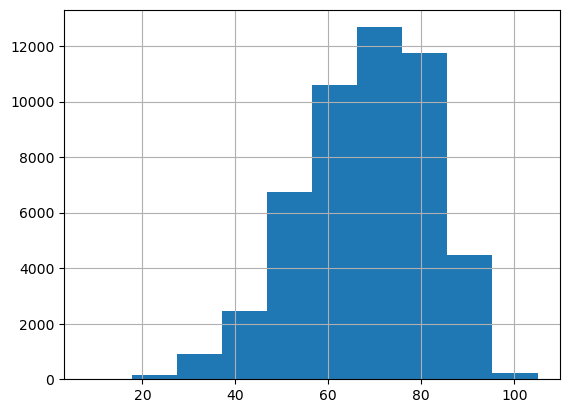

In [136]:
data_test.AGE.hist()

##### CREG_CODE
Cancer registry catchment area code, no missing value

1. do we want to map this?

In [137]:
data_test.CREG_CODE.value_counts()

L0801    10112
L1001     7472
L0201     6971
L1701     6827
L0401     5566
L1201     5340
L0301     5094
L0901     2618
Name: CREG_CODE, dtype: int64

##### SCREENINGSTATUSFULL_CODE

In [138]:
data_test.SCREENINGSTATUSFULL_CODE.value_counts()

6001.0    5659
6006.0    2751
6012.0    2237
7010.0    1631
6013.0    1276
7006.0     928
6014.0     916
6021.0     908
7001.0     798
6022.0     282
7009.0      44
7002.0      20
6007.0      20
7007.0      14
6002.0      12
7012.0      10
7003.0       8
6020.0       5
1.0          4
6008.0       3
7008.0       3
7005.0       2
6015.0       1
6009.0       1
9.0          1
Name: SCREENINGSTATUSFULL_CODE, dtype: int64

##### 'ER_STATUS', 'ER_SCORE', 'PR_STATUS','PR_SCORE', 'HER2_STATUS'
#####As theses markers are specific to breast cancer, and breast cancer ensure whether to use them in the model.
####If these markers are used only those with a location code beginning with C50(Breast cancer) will have these.

In [139]:
data_test.ER_STATUS.value_counts()

P     13015
U      2488
N      2286
Pm       88
X        19
B        10
Name: ER_STATUS, dtype: int64

In [140]:
data_test.drop(['SCREENINGSTATUSFULL_CODE','ER_STATUS', 'ER_SCORE', 'PR_STATUS','PR_SCORE', 'HER2_STATUS'], axis=1, inplace=True)

##### CANCERCAREPLANINTENT
9	Not known   
C	Curative   
X	No active treatment    
Z	Non Curative

1. assume cm and zm is an entry error and recode them as C & Z respecively and recode

In [141]:
data_test.CANCERCAREPLANINTENT.value_counts()

C     16607
Z      5473
9      2917
X      1053
Cm      283
Zm       63
Name: CANCERCAREPLANINTENT, dtype: int64

In [142]:
data_test['CANCERCAREPLANINTENT'] = data_test['CANCERCAREPLANINTENT'].replace({'Cm': 'C', 'Zm':'Z'})

In [143]:
data_test.CANCERCAREPLANINTENT.value_counts()

C    16890
Z     5536
9     2917
X     1053
Name: CANCERCAREPLANINTENT, dtype: int64

In [144]:
# fill null values with 9 which is not known
data_test.loc[data_test['CANCERCAREPLANINTENT'].isnull(), 'CANCERCAREPLANINTENT'] = '9'

##### PERFORMANCESTATUS

Performance status.   
0 = Able carry out all normal activity without restriction   
1 = Restricted in physically strenuous activity, but able to walk and do light work   
2 = Able to walk and capable of all self care, but unable to carry out any work. Up and about more than 50% of waking hours  
3 = Capable of only limited self care, confined to bed or chair more than 50% of waking hours   
4 = Completely disabled. Cannot carry on any self care. Totally confined to bed or chair  
9 = Not recorded  
1. make same assumption as cancercareplan.. recode

In [145]:
data_test.PERFORMANCESTATUS.value_counts()

0     9677
1     5441
9     3866
2     2649
3     2236
4      655
1m     335
2m     189
3m      99
4m      27
Name: PERFORMANCESTATUS, dtype: int64

In [146]:
data_test['PERFORMANCESTATUS'] = (data_test['PERFORMANCESTATUS'].replace({'1m' :'1', '2m': '2', '3m': '3', '4m': '4'}))
data_test.PERFORMANCESTATUS.value_counts()

0    9677
1    5776
9    3866
2    2838
3    2335
4     682
Name: PERFORMANCESTATUS, dtype: int64

In [147]:
# fill null values with 9 which is Not recorded
data_test.loc[data_test['PERFORMANCESTATUS'].isnull(), 'PERFORMANCESTATUS'] = '9'

##### CNS    
Clinical Nurse Specialist

In [148]:
data_test.CNS.value_counts()

Y1     7752
99     3449
Y2     1154
NI      339
NN       99
Y1m      86
Y4       54
Y3       17
Y2m      12
Y4m       2
NIm       2
Name: CNS, dtype: int64

##### ACE27
Adult Comorbidity Evaluation 27    
Valid comorbidity scores should be 0-3

In [149]:
data_test.ACE27.value_counts()

9     2572
0     1928
1      727
2      510
3      425
1m      64
2m      40
3m      26
Name: ACE27, dtype: int64

In [150]:
data_test['ACE27'] = data_test['ACE27'].replace({'1m': '1', '2m':'2', '3m':'3'})
data_test.ACE27.value_counts()

9    2572
0    1928
1     791
2     550
3     451
Name: ACE27, dtype: int64

##### Laterality
No misssing value   
9	X NOT KNOWN    
B	BILATERAL     
L	LEFT     
M	MIDLINE      
R	RIGHT

In [151]:
data_test.LATERALITY.value_counts()

R    17813
L    16382
9    15625
M      106
B       74
Name: LATERALITY, dtype: int64

##### quintile_2015
Measure of deprivation at small area level made up from the income domain in 2015, quintiles are calculated from populations   
no missing value
                                        
1 - least deprived   
2  
3     
4                      
5 - most deprived     

In [152]:
data_test.QUINTILE_2015.value_counts()

2                     10697
3                     10154
1 - least deprived    10139
4                      9631
5 - most deprived      9379
Name: QUINTILE_2015, dtype: int64

In [153]:
# Extract numbers, this is an ordianal variable

data_test['QUINTILE_2015'] = data_test['QUINTILE_2015'].apply(lambda x: x[:1])

data_test.QUINTILE_2015.value_counts()

2    10697
3    10154
1    10139
4     9631
5     9379
Name: QUINTILE_2015, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83582 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PATIENTID             83582 non-null  int64  
 1   ETHNICITY             81942 non-null  object 
 2   DEATHCAUSECODE_1A     83582 non-null  object 
 3   DEATHLOCATIONCODE     83582 non-null  object 
 4   NEWVITALSTATUS        83582 non-null  Int32  
 5   VITALSTATUSDATE       83582 non-null  int64  
 6   SEX                   83582 non-null  int64  
 7   TUMOURID              83582 non-null  int64  
 8   DIAGNOSISDATEBEST     83582 non-null  int64  
 9   SITE_ICD10_O2         83582 non-null  object 
 10  MORPH_ICD10_O2        83559 non-null  float64
 11  BEHAVIOUR_ICD10_O2    83559 non-null  object 
 12  T_BEST                74229 non-null  object 
 13  N_BEST                74106 non-null  object 
 14  M_BEST                66279 non-null  object 
 15  STAGE_BEST         

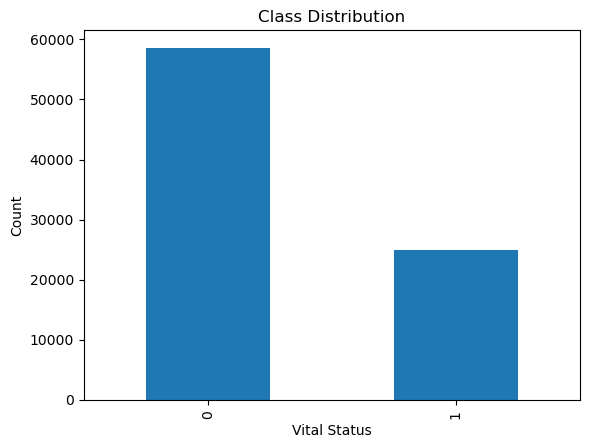

In [176]:
# Class Distribution Visualization
class_counts = data['NEWVITALSTATUS'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Vital Status')
plt.ylabel('Count')
plt.show()

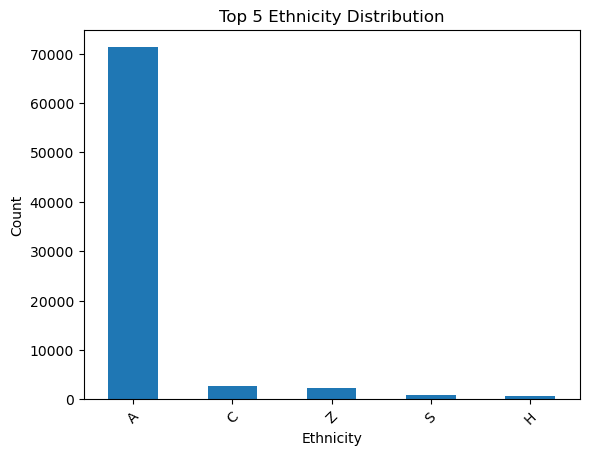

In [178]:
# Top 5 Ethnicity Distribution
top_ethnicities = data['ETHNICITY'].value_counts().head(5)
top_ethnicities.plot(kind='bar')
plt.title('Top 5 Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


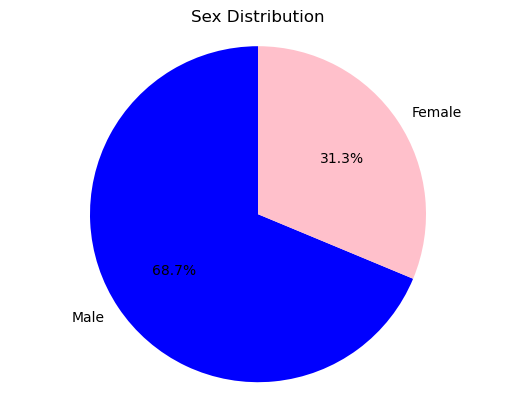

In [179]:
# Sex Distribution as a Pie Chart
sex_counts = data['SEX'].value_counts()
sex_labels = ['Male', 'Female']  # You can adjust the labels as needed
plt.pie(sex_counts, labels=sex_labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
plt.title('Sex Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [182]:
data.head()

,PATIENTID,ETHNICITY,DEATHCAUSECODE_1A,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE,SEX,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,...,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,LATERALITY,QUINTILE_2015,SURGERYSTATUS
0,20011904,R,A000,A,0,2019,2,20011904,2013,C503,...,NaN,2,G3,61,L0801,9,9,L,1,1
1,40016070,A,"C349,J449",2,1,2017,2,40016070,2017,C340,...,1,4,GX,90,L1701,Z,1,R,5,0
2,20203163,A,A000,A,0,2019,2,20203163,2017,C502,...,0,1,G2,66,L0401,9,9,R,2,1
4,20051096,A,A000,A,0,2019,2,20051096,2015,C509,...,0,2,G2,68,L0901,C,0,L,3,1
5,20067811,A,A000,A,0,2019,2,20067811,2017,C504,...,0,2,G2,59,L0901,9,9,L,2,1


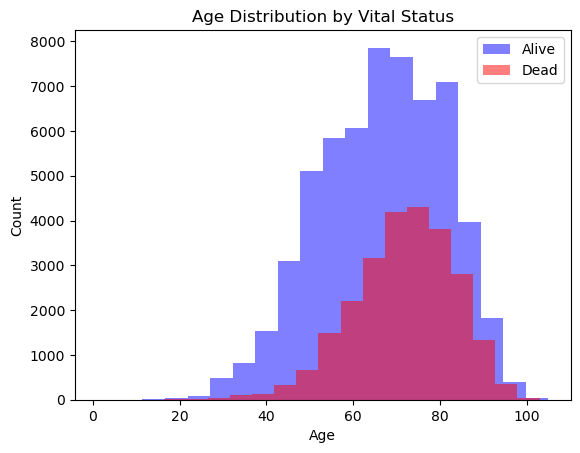

In [184]:
# Age Distribution by Vital Status
alive_data = data[data['NEWVITALSTATUS'] == 0]
dead_data = data[data['NEWVITALSTATUS'] == 1]

plt.hist(alive_data['AGE'], bins=20, alpha=0.5, label='Alive', color='blue')
plt.hist(dead_data['AGE'], bins=20, alpha=0.5, label='Dead', color='red')
plt.title('Age Distribution by Vital Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

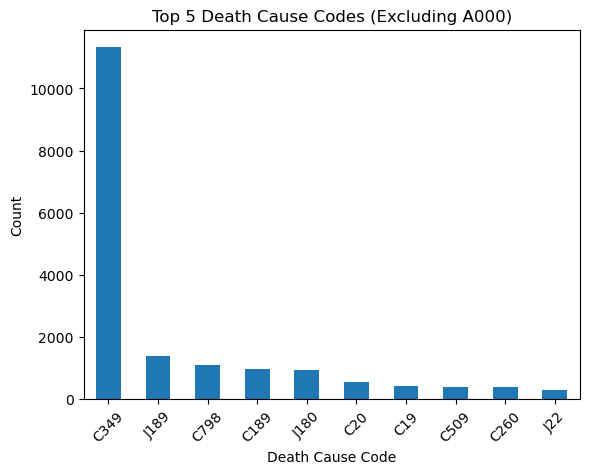

In [188]:
# Excluding Death Cause Code 'A000'
filtered_data = data[data['DEATHCAUSECODE_1A'] != 'A000']
top_death_cause_codes = filtered_data['DEATHCAUSECODE_1A'].value_counts().head(10)
top_death_cause_codes.plot(kind='bar')
plt.title('Top 5 Death Cause Codes (Excluding A000)')
plt.xlabel('Death Cause Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [192]:
# Load the death location code descriptions from the Excel file
lookup_tables = pd.read_excel('/kaggle/input/bip-cancer-technical-challenge/all_z_lookup_tables.xlsx', sheet_name='zdeathlocation')

# Create a dictionary to map death location codes to descriptions
death_location_dict = dict(zip(lookup_tables['ZDEATHLOCATIONID'], lookup_tables['SHORTDESC']))

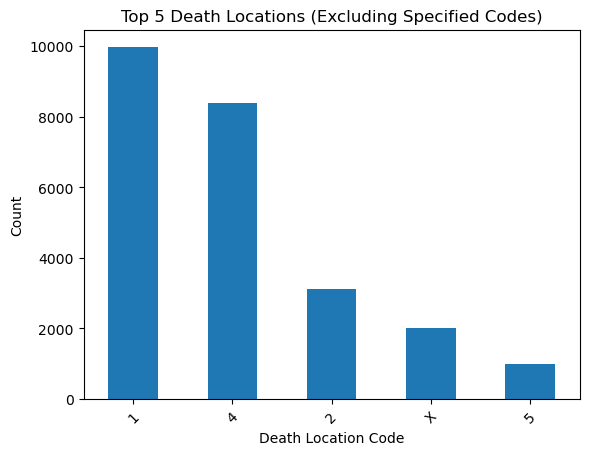

In [193]:
# Excluding specific death location codes
excluded_codes = ['A']  # Add any codes you want to exclude here
filtered_data = data[~data['DEATHLOCATIONCODE'].isin(excluded_codes)]

# Top 5 Death Locations Visualization (excluding specified codes)
top_death_locations = filtered_data['DEATHLOCATIONCODE'].value_counts().head(5)
top_death_locations.plot(kind='bar')
plt.title('Top 5 Death Locations (Excluding Specified Codes)')
plt.xlabel('Death Location Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [194]:
# Interpretation
print("Interpretation: Top 5 Death Locations (Excluding Specified Codes) and Their Descriptions\n")
for code, count in top_death_locations.items():
    location_description = death_location_dict.get(code, 'Description not available')
    print(f"Death Location Code: {code}")
    print(f"Description: {location_description}")
    print(f"Number of Deaths: {count}\n")

Interpretation: Top 5 Death Locations (Excluding Specified Codes) and Their Descriptions

Death Location Code: 1
Description: HOSPITAL
Number of Deaths: 9968

Death Location Code: 4
Description: NURSING HOME
Number of Deaths: 8392

Death Location Code: 2
Description: PRIVATE HOME
Number of Deaths: 3131

Death Location Code: X
Description: UNKNOWN
Number of Deaths: 2011

Death Location Code: 5
Description: OTHER
Number of Deaths: 1003



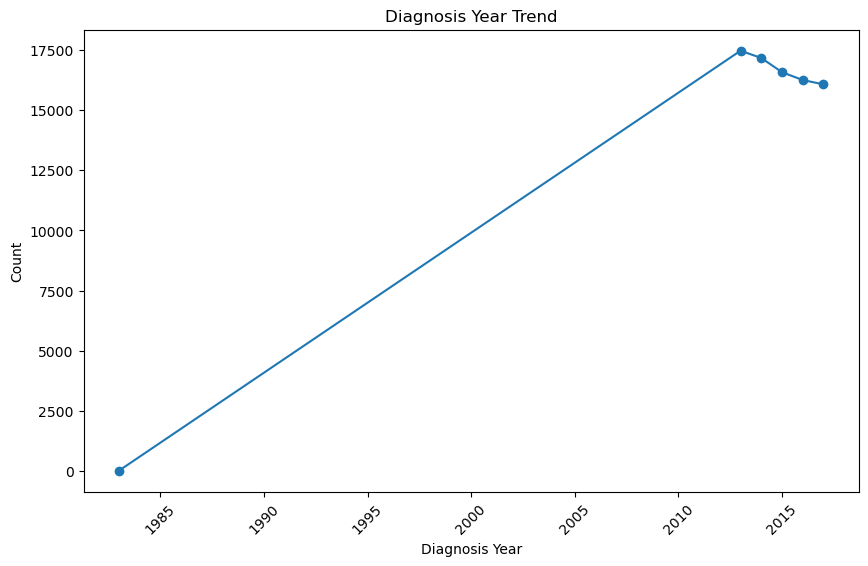

In [198]:
# Extract years from the Diagnosis Date column
data['DIAGNOSISYEAR'] = data['DIAGNOSISDATEBEST']

# Diagnosis Year Trend Visualization as a Line Chart
diagnosis_year_counts = data['DIAGNOSISYEAR'].value_counts().sort_index()
diagnosis_year_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Diagnosis Year Trend')
plt.xlabel('Diagnosis Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [200]:
# Load stage descriptions from the Kaggle link
stage_descriptions = pd.read_excel('/kaggle/input/bip-cancer-technical-challenge/all_z_lookup_tables.xlsx', sheet_name='zstage')
stage_dict = dict(zip(stage_descriptions['ZSTAGEID'], stage_descriptions['SHORTDESC']))

# Create a new DataFrame with stage and vital status information
stage_vital_status = data[['STAGE_BEST', 'NEWVITALSTATUS']].copy()


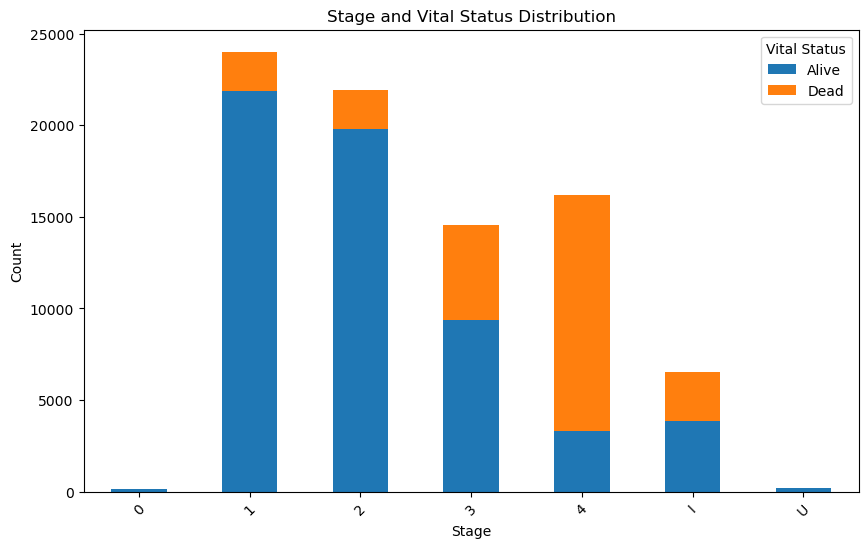

In [201]:
# Group by stage and vital status, then count occurrences
stage_vital_status_counts = stage_vital_status.groupby(['STAGE_BEST', 'NEWVITALSTATUS']).size().unstack()

# Plot a stacked bar chart
stage_vital_status_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stage and Vital Status Distribution')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Vital Status', labels=['Alive', 'Dead'])
plt.show()

In [202]:
# Interpretation
print("Interpretation: Stage and Vital Status Distribution\n")
for stage, row in stage_vital_status_counts.iterrows():
    stage_description = stage_dict.get(stage, 'Description not available')
    print(f"Stage: {stage} - {stage_description}")
    print(f"Alive: {row[0]}")
    print(f"Dead: {row[1]}\n")

Interpretation: Stage and Vital Status Distribution

Stage: 0 - 0
Alive: 141
Dead: 5

Stage: 1 - 1
Alive: 21880
Dead: 2137

Stage: 2 - 2
Alive: 19813
Dead: 2114

Stage: 3 - 3
Alive: 9387
Dead: 5167

Stage: 4 - 4
Alive: 3333
Dead: 12846

Stage: I - Description not available
Alive: 3864
Dead: 2676

Stage: U - UNSTAGEABLE
Alive: 176
Dead: 43



In [203]:
# Load behaviour descriptions from the Excel file
behaviour_tables = pd.read_excel('/kaggle/input/bip-cancer-technical-challenge/all_z_lookup_tables.xlsx', sheet_name='zbehaviour')
behaviour_dict = dict(zip(behaviour_tables['ZBEHAVIOURID'], behaviour_tables['SHORTDESC']))

# Create a new DataFrame with BEHAVIOUR_ICD10_O2 and vital status information
behaviour_vital_status = data[['BEHAVIOUR_ICD10_O2', 'NEWVITALSTATUS']].copy()

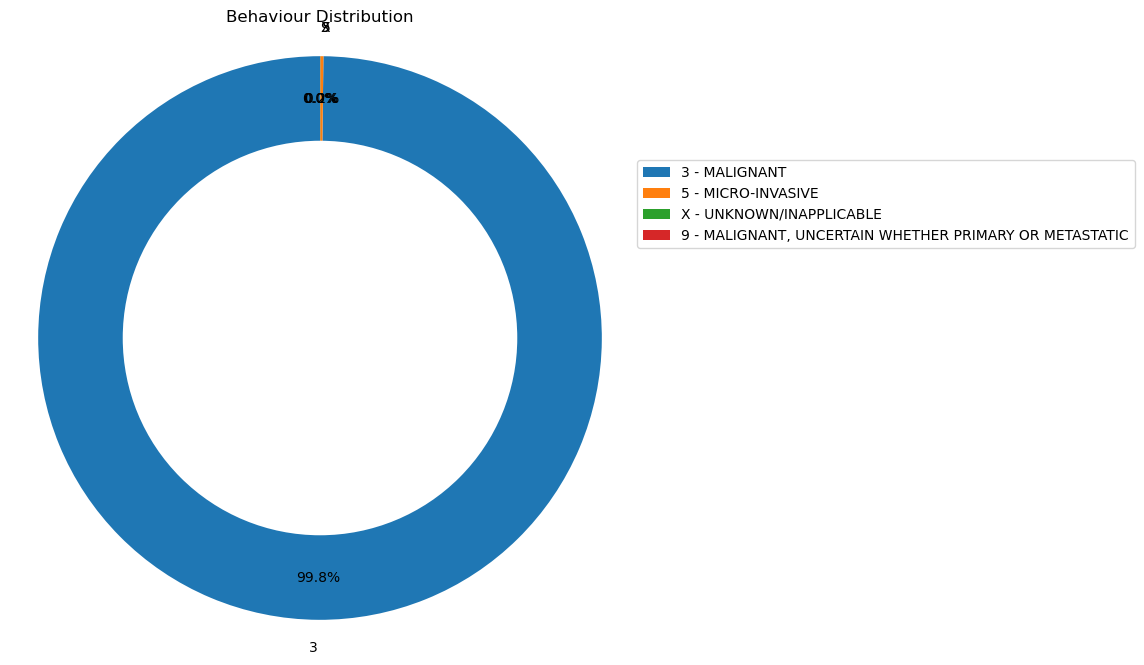

In [208]:
# Create a new DataFrame with behaviour information
behaviour_counts = data['BEHAVIOUR_ICD10_O2'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(behaviour_counts, labels=behaviour_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Behaviour Distribution')
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))  # Add a white circle to create a "donut" chart effect
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a legend with behaviour descriptions
legend_labels = [f"{label} - {behaviour_dict.get(label, 'Unknown')}" for label in behaviour_counts.index]
plt.legend(legend_labels, bbox_to_anchor=(1, 0.8), loc="upper left")

plt.show()

In [207]:
# Interpretation
print("Interpretation: Behaviour Distribution\n")
for behaviour, count in behaviour_counts.items():
    behaviour_description = behaviour_dict.get(behaviour, 'Description not available')
    print(f"Behaviour: {behaviour} - {behaviour_description}")
    print(f"Count: {count}\n")

Interpretation: Behaviour Distribution

Behaviour: 3 - MALIGNANT
Count: 83397

Behaviour: 5 - MICRO-INVASIVE
Count: 141

Behaviour: X - UNKNOWN/INAPPLICABLE
Count: 13

Behaviour: 9 - MALIGNANT, UNCERTAIN WHETHER PRIMARY OR METASTATIC
Count: 8



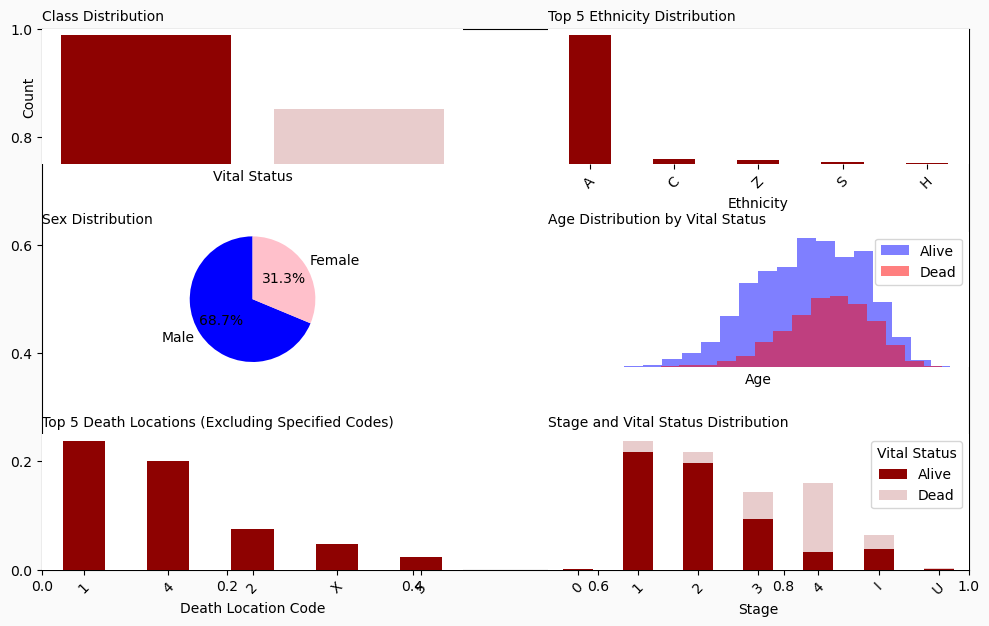

In [248]:
import matplotlib.gridspec as gridspec

# Create figure and subplots for the Dashboard
fig, axs = plt.subplots(figsize=(50, 80), facecolor='#fafafa')

# Create a gridspec layout with rows of varying heights
gs = gridspec.GridSpec(3, 2, height_ratios=[2, 2, 2], hspace=0.5)  # Adjust height ratios as needed

# Define subplots using gridspec layout
axs = [
    [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1])],
    [fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])],
    [fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[2, 1])]
]

# Remove all axis labels and ticks
for ax_row in axs:
    for ax in ax_row:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

# Class Distribution Visualization
axs[0][0].bar(class_counts.index, class_counts.values, color=['#8e0201', '#e8cccc'])
axs[0][0].set_title('Class Distribution', fontsize=10, loc='left')
axs[0][0].set_xlabel('Vital Status')
axs[0][0].set_ylabel('Count')

# Top 5 Ethnicity Distribution
top_ethnicities.plot(kind='bar', ax=axs[0][1], color='#8e0201')
axs[0][1].set_title('Top 5 Ethnicity Distribution', fontsize=10, loc='left')
axs[0][1].set_xlabel('Ethnicity')
# axs[0][1].set_ylabel('Count')
axs[0][1].tick_params(axis='x', rotation=45)

# Sex Distribution as a Pie Chart
axs[1][0].pie(sex_counts, labels=sex_labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
axs[1][0].set_title('Sex Distribution', fontsize=10, loc='left')
axs[1][0].axis('equal')

# Age Distribution by Vital Status
alive_data = data[data['NEWVITALSTATUS'] == 0]
dead_data = data[data['NEWVITALSTATUS'] == 1]
axs[1][1].hist(alive_data['AGE'], bins=20, alpha=0.5, label='Alive', color='blue')
axs[1][1].hist(dead_data['AGE'], bins=20, alpha=0.5, label='Dead', color='red')
axs[1][1].set_title('Age Distribution by Vital Status', fontsize=10, loc='left')
axs[1][1].set_xlabel('Age')
# axs[1][1].set_ylabel('Count')
axs[1][1].legend()


# Excluding specific death location codes
excluded_codes = ['A']  # Add any codes you want to exclude here
filtered_data = data[~data['DEATHLOCATIONCODE'].isin(excluded_codes)]
top_death_locations = filtered_data['DEATHLOCATIONCODE'].value_counts().head(5)
top_death_locations.plot(kind='bar', ax=axs[2][0], color='#8e0201')
axs[2][0].set_title('Top 5 Death Locations (Excluding Specified Codes)', fontsize=10, loc='left')
axs[2][0].set_xlabel('Death Location Code')
# axs[2][0].set_ylabel('Count')
axs[2][0].tick_params(axis='x', rotation=45)

# Stage and Vital Status Distribution
stage_vital_status_counts.plot(kind='bar', stacked=True, figsize=(10, 6), ax=axs[2][1], color=['#8e0201', '#e8cccc'])
axs[2][1].set_title('Stage and Vital Status Distribution', fontsize=10, loc='left')
axs[2][1].set_xlabel('Stage')
# axs[2][1].set_ylabel('Count')
axs[2][1].tick_params(axis='x', rotation=45)
axs[2][1].legend(title='Vital Status', labels=['Alive', 'Dead'])


# Adjust spacing between subplots
fig.tight_layout()

# Display the Dashboard
plt.show()


# MODEL

### Model Preamble

In [155]:
!pip install category_encoders

In [156]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer


# from sklearn.model_selection import train_test_split, cross_val_score, KFold
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_selection import RFECV

In [157]:
data.columns

Index(['PATIENTID', 'ETHNICITY', 'DEATHCAUSECODE_1A', 'DEATHLOCATIONCODE',
       'NEWVITALSTATUS', 'VITALSTATUSDATE', 'SEX', 'TUMOURID',
       'DIAGNOSISDATEBEST', 'SITE_ICD10_O2', 'MORPH_ICD10_O2',
       'BEHAVIOUR_ICD10_O2', 'T_BEST', 'N_BEST', 'M_BEST', 'STAGE_BEST',
       'GRADE', 'AGE', 'CREG_CODE', 'CANCERCAREPLANINTENT',
       'PERFORMANCESTATUS', 'LATERALITY', 'QUINTILE_2015', 'SURGERYSTATUS'],
      dtype='object')

In [158]:
data_test.columns

Index(['PATIENTID', 'ETHNICITY', 'DEATHCAUSECODE_1A', 'DEATHLOCATIONCODE',
       'VITALSTATUSDATE', 'SEX', 'TUMOURID', 'DIAGNOSISDATEBEST',
       'SITE_ICD10_O2', 'MORPH_ICD10_O2', 'BEHAVIOUR_ICD10_O2', 'T_BEST',
       'N_BEST', 'M_BEST', 'STAGE_BEST', 'GRADE', 'AGE', 'CREG_CODE',
       'CANCERCAREPLANINTENT', 'PERFORMANCESTATUS', 'CNS', 'ACE27',
       'DATE_FIRST_SURGERY', 'LATERALITY', 'QUINTILE_2015', 'SURGERYSTATUS'],
      dtype='object')

In [159]:
# Set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

In [160]:
#Splitting to INFORMATIVE AND TARGET , while dropping features like primary and foreign key
X_train =data.drop(['PATIENTID','TUMOURID','T_BEST','DEATHCAUSECODE_1A','DEATHLOCATIONCODE','N_BEST','M_BEST','NEWVITALSTATUS','VITALSTATUSDATE'],axis=1)
y_train = data['NEWVITALSTATUS']

In [161]:
X_test =data_test.drop(['PATIENTID','TUMOURID','DEATHCAUSECODE_1A','T_BEST','N_BEST','M_BEST','VITALSTATUSDATE','CNS', 'ACE27',
       'DATE_FIRST_SURGERY'],axis=1)

In [162]:
imputer = SimpleImputer(strategy='median')  
imputer  = Pipeline(steps=[('imputer', imputer)])

In [163]:
#One hot Encoder for categorical columns
cat_features = X_train.select_dtypes(exclude=['float', 'int']).columns.tolist()

# Create a transformer for categorical features
cat_transformer = make_pipeline(
    OneHotEncoder(
        sparse=False,
        handle_unknown='infrequent_if_exist', min_frequency=0.01
    )
)

In [164]:
cat_features

['ETHNICITY',
 'SITE_ICD10_O2',
 'BEHAVIOUR_ICD10_O2',
 'STAGE_BEST',
 'GRADE',
 'CREG_CODE',
 'CANCERCAREPLANINTENT',
 'PERFORMANCESTATUS',
 'LATERALITY',
 'QUINTILE_2015']

In [165]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83582 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ETHNICITY             81942 non-null  object 
 1   SEX                   83582 non-null  int64  
 2   DIAGNOSISDATEBEST     83582 non-null  int64  
 3   SITE_ICD10_O2         83582 non-null  object 
 4   MORPH_ICD10_O2        83559 non-null  float64
 5   BEHAVIOUR_ICD10_O2    83559 non-null  object 
 6   STAGE_BEST            83582 non-null  object 
 7   GRADE                 83559 non-null  object 
 8   AGE                   83582 non-null  int64  
 9   CREG_CODE             83582 non-null  object 
 10  CANCERCAREPLANINTENT  83582 non-null  object 
 11  PERFORMANCESTATUS     83582 non-null  object 
 12  LATERALITY            83582 non-null  object 
 13  QUINTILE_2015         83582 non-null  object 
 14  SURGERYSTATUS         83582 non-null  int64  
dtypes: float64(1), int6

In [166]:
# Convert all values in categorical columns to strings
categorical_columns = [cat_features]
for col in categorical_columns:
    X_train[col] = X_train[col].astype(str)

In [167]:
#setting up a pipeline for scaling the numerical features
numeric_features = X_train.select_dtypes(exclude=['bool', 'object']).columns.tolist()
numeric_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
    
).set_output(transform='pandas')
numeric_transformer

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [168]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features),
        ("num", numeric_transformer,numeric_features)
    ],
    remainder="passthrough"
).set_output(transform='pandas')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.01,
                                                                sparse=False))]),
                                 ['ETHNICITY', 'SITE_ICD10_O2',
                                  'BEHAVIOUR_ICD10_O2', 'STAGE_BEST', 'GRADE',
                                  'CREG_CODE', 'CANCERCAREPLANINTENT',
                                  'PERFORMANCESTATUS', 'LATERALITY',
                                  'QUINTILE_2015']),
                                ('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['SEX', 'DIAGNOSISDATEBEST', 'MORPH_ICD10_O2',
                                  'AGE', 'SURGERYSTATUS'])])

In [169]:
X_train.head()

,ETHNICITY,SEX,DIAGNOSISDATEBEST,SITE_ICD10_O2,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,LATERALITY,QUINTILE_2015,SURGERYSTATUS
0,R,2,2013,C503,8500.0,3,2,G3,61,L0801,9,9,L,1,1
1,A,2,2017,C340,8046.0,3,4,GX,90,L1701,Z,1,R,5,0
2,A,2,2017,C502,8500.0,3,1,G2,66,L0401,9,9,R,2,1
4,A,2,2015,C509,8500.0,3,2,G2,68,L0901,C,0,L,3,1
5,A,2,2017,C504,8500.0,3,2,G2,59,L0901,9,9,L,2,1


In [170]:
X_train = preprocessor.fit_transform(X_train)
X_train

,cat__ETHNICITY_A,cat__ETHNICITY_C,cat__ETHNICITY_S,cat__ETHNICITY_Z,cat__ETHNICITY_nan,cat__ETHNICITY_infrequent_sklearn,cat__SITE_ICD10_O2_C180,cat__SITE_ICD10_O2_C182,cat__SITE_ICD10_O2_C184,cat__SITE_ICD10_O2_C187,...,cat__QUINTILE_2015_1,cat__QUINTILE_2015_2,cat__QUINTILE_2015_3,cat__QUINTILE_2015_4,cat__QUINTILE_2015_5,num__SEX,num__DIAGNOSISDATEBEST,num__MORPH_ICD10_O2,num__AGE,num__SURGERYSTATUS
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.674587,-1.376900,1.104430,-0.515876,0.694264
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.674587,1.440059,-1.079357,1.589131,-1.440374
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.674587,1.440059,1.104430,-0.152944,0.694264
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.674587,0.031580,1.104430,-0.007771,0.694264
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.674587,1.440059,1.104430,-0.661049,0.694264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.674587,1.440059,1.104430,-0.733635,0.694264
99996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.674587,0.735819,1.104430,0.209988,0.694264
99997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,-1.482388,0.031580,-0.627207,0.572921,-1.440374
99998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.674587,-0.672660,1.210252,0.064816,0.694264


In [171]:
X_test = preprocessor.transform(X_test)
X_test

,cat__ETHNICITY_A,cat__ETHNICITY_C,cat__ETHNICITY_S,cat__ETHNICITY_Z,cat__ETHNICITY_nan,cat__ETHNICITY_infrequent_sklearn,cat__SITE_ICD10_O2_C180,cat__SITE_ICD10_O2_C182,cat__SITE_ICD10_O2_C184,cat__SITE_ICD10_O2_C187,...,cat__QUINTILE_2015_1,cat__QUINTILE_2015_2,cat__QUINTILE_2015_3,cat__QUINTILE_2015_4,cat__QUINTILE_2015_5,num__SEX,num__DIAGNOSISDATEBEST,num__MORPH_ICD10_O2,num__AGE,num__SURGERYSTATUS
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.674587,1.440059,1.104430,0.863266,0.694264
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,-1.482388,-1.376900,-0.627207,-0.370703,0.694264
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-1.482388,-1.376900,-0.627207,-0.370703,-1.440374
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,-1.482388,0.031580,-0.627207,0.209988,-1.440374
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.674587,-0.672660,-0.627207,-0.588462,0.694264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.674587,1.440059,-0.627207,0.500334,-1.440374
49996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.674587,0.735819,1.104430,-0.152944,0.694264
49997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.482388,-1.376900,-1.300622,0.935853,-1.440374
49998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.674587,-0.672660,-1.300622,-0.007771,-1.440374


In [172]:
X_test.shape

(50000, 71)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,make_scorer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# Initialize classifiers
svm_classifier = SVC(kernel='linear', random_state=random_seed)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
rf_classifier = RandomForestClassifier(random_state=random_seed)


In [ ]:
# Create a pipeline for the linear regression model with recursive feature elimination
pipe_rfe = Pipeline([
    ('selector', RFECV(LinearRegression())),
    ('estimator', svm_classifier)
]).set_output(transform='pandas')
pipe_rfe

In [ ]:
# Define the parameter grid for the grid search
param_grid_rfe = {
    'selector__step': [1, 5]
}

In [ ]:
X_train.isna().sum()

In [ ]:
# Perform a grid search to find the best hyperparameters and feature selector
grid_rfe = GridSearchCV(pipe_rfe, param_grid=param_grid_rfe, n_jobs=-1, cv=5)
grid_rfe.fit(X_train, y_train)

In [ ]:
# Print the best hyperparameters and feature selector
print("\nRecursive feature elimination")
print(f"Best hyperparameters: {grid_rfe.best_params_}")
print(f"Best feature selector: {grid_rfe.best_estimator_.named_steps['selector']}")

In [ ]:
# Create a new pipeline with the best feature selector and fit on the training data
best_pipe_rfe = Pipeline([
#     ('preprocessor',preprocessor),
    ('selector', grid_rfe.best_estimator_.named_steps['selector']),
    ('estimator', svm_classifier)
]).set_output(transform='pandas')
best_pipe_rfe

In [ ]:
best_pipe_rfe.fit(X_train, y_train)

In [ ]:
best_pipe_rfe['selector'].get_feature_names_out()

In [ ]:
y_pred_rf = best_pipe_rfe.predict(X_test)
y_pred_rf

In [ ]:
best_features = best_pipe_rfe['selector'].get_feature_names_out().tolist()

In [ ]:
X_train = X_train[best_features]
X_train.shape

In [ ]:
X_test = X_test[best_features]

In [ ]:
knn_classifier.fit(X_train, y_train)

In [ ]:
y_predknn = knn_classifier.predict(X_test)

In [ ]:
y_predknn

In [ ]:
df_preds_result = pd.DataFrame({
    'PATIENTID': data_test['PATIENTID'],
    'NEWVITALSTATUS': y_predknn
})

# Save the cross-validation results to a CSV file
df_preds_result.to_csv('y_predknn.csv', index=False)

In [ ]:
svm_classifier.fit(X_train, y_train)

In [ ]:
svm_pred= svm_classifier.predict(X_test)

In [ ]:
pred = pd.DataFrame(svm_pred).tail(10)

In [ ]:
pd.concat([data_test['PATIENTID'].tail(10),pred],axis=1)

In [ ]:
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [ ]:
rf_p = pd.DataFrame(rf_pred).head(10)

In [ ]:
pd.concat([data_test['PATIENTID'].head(10),rf_p],axis=1)

In [ ]:
# Create a DataFrame to store the cross-validation predictions
RF_preds_result = pd.DataFrame({
    'PATIENTID': data_test['PATIENTID'],
    'NEWVITALSTATUS': rf_pred
})

# Save the cross-validation results to a CSV file
RF_preds_result.to_csv('rf_pred.csv', index=False)

In [ ]:
# Create a DataFrame to store the cross-validation predictions
SN_preds_result = pd.DataFrame({
    'PATIENTID': data_test['PATIENTID'],
    'NEWVITALSTATUS': svm_pred
})

# Save the cross-validation results to a CSV file
SN_preds_result.to_csv('svm_pred.csv', index=False)

In [ ]:
# !pip install shap

In [ ]:
import shap
shap.initjs()

In [ ]:
column_names = X_test.columns.tolist()
column_names

In [ ]:
rf_classifier.fit(X_train, y_train)

In [ ]:
X100 = shap.utils.sample(X_test, 100)
X100

In [ ]:
sample_size = 1000 # Number of samples to select
random_sample = X_test.sample(n=sample_size, random_state=42)

In [ ]:
explainer = shap.Explainer(rf_classifier.predict, X100)
shap_values = explainer(random_sample)

In [ ]:
shap.summary_plot(shap_values, random_sample, max_display=8)

In [ ]:
shap.plots.waterfall(shap_values[100])

In [ ]:
#plot the feature importance
shap.summary_plot(shap_values, random_sample, plot_type="bar",max_display=10)

In [ ]:
#set the tree explainer as the model of the pipeline
explainer2 = shap.TreeExplainer(rf_classifier)

In [ ]:
rf_classifier.predict(random_sample.head(3))

In [ ]:
# Create an Explanation object
expected_value = explainer2.expected_value  # Expected value of the model
shap_values2 = shap_values[5]  # Assuming you want to plot for a single instance, adjust as needed

In [ ]:
shap_values[5]

In [ ]:
explanation = shap.Explanation(
    values=shap_values2,
    base_values=expected_value,
    data=random_sample,  # Data for the instance you want to explain
    feature_names=column_names
)
explanation

In [ ]:
shap.force_plot(
    explanation.base_values,
    explanation.values,
    features=explanation.data,
    feature_names=explanation.feature_names
)

In [ ]:
# to check the scores , Mo needs to upload the test dataset on